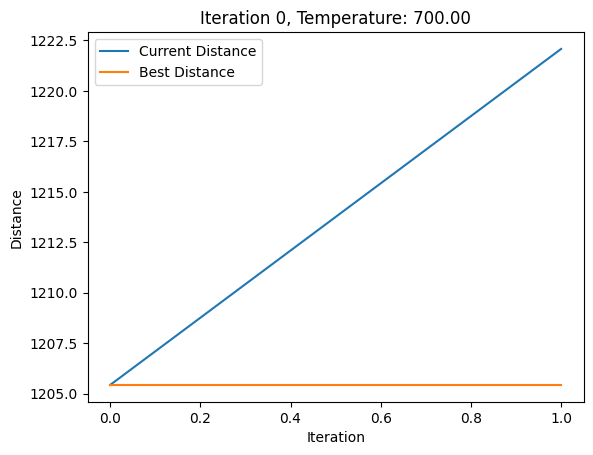

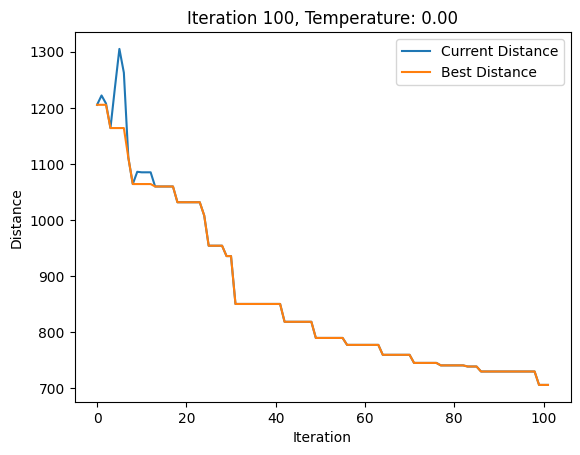

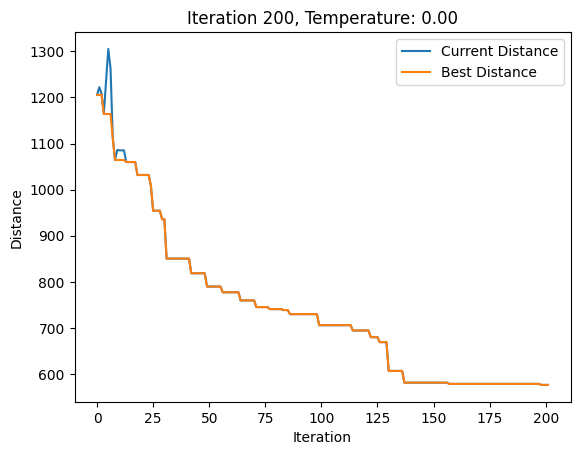

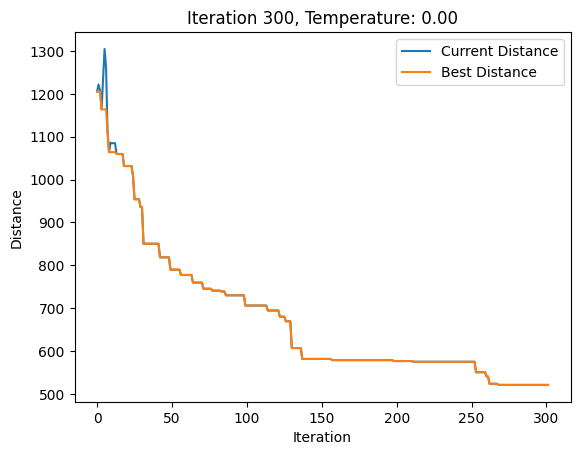

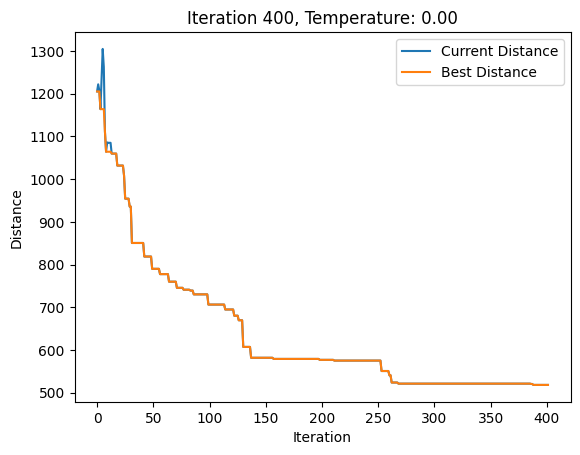

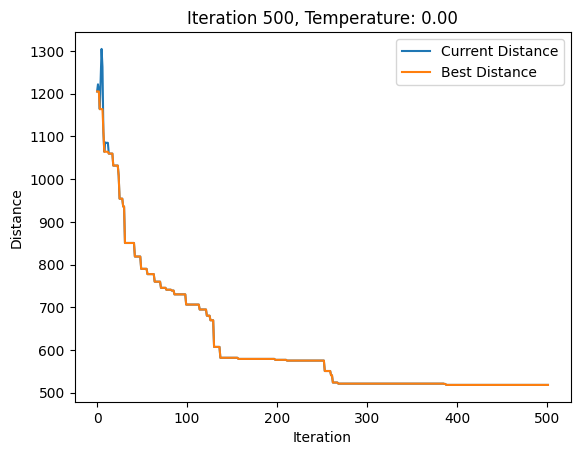

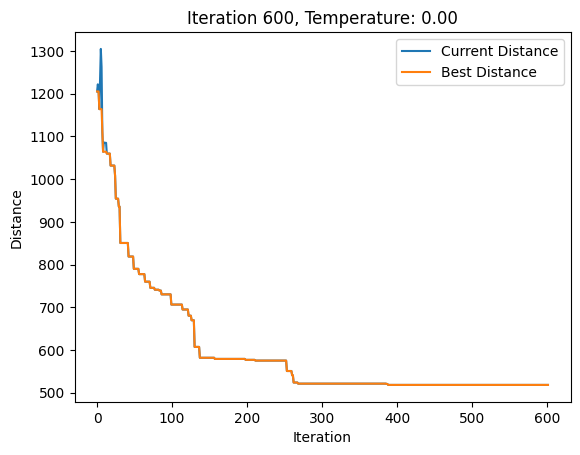

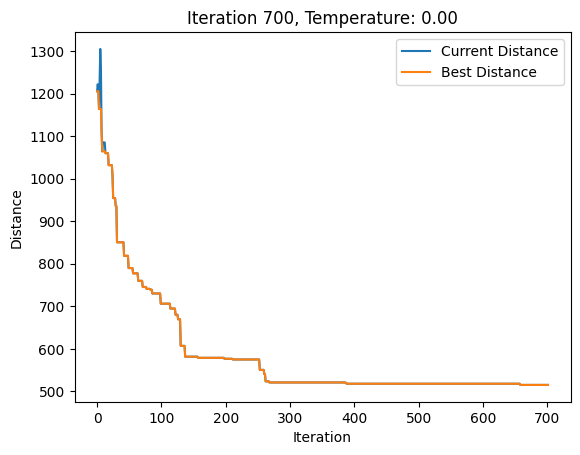

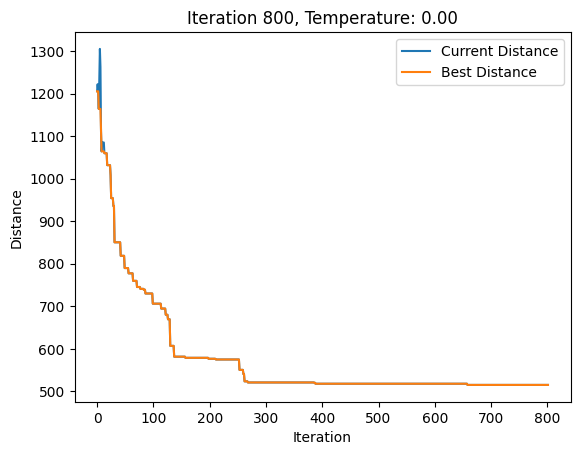

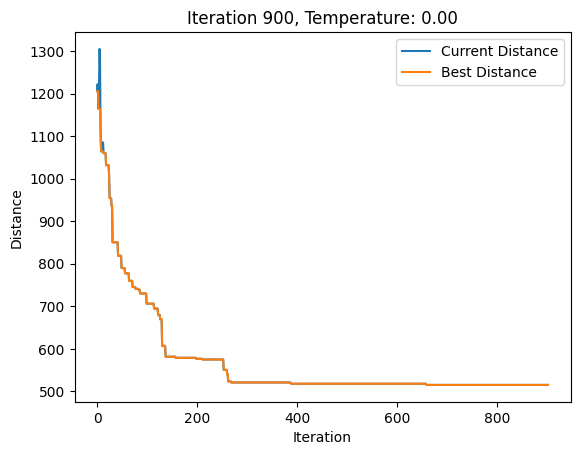

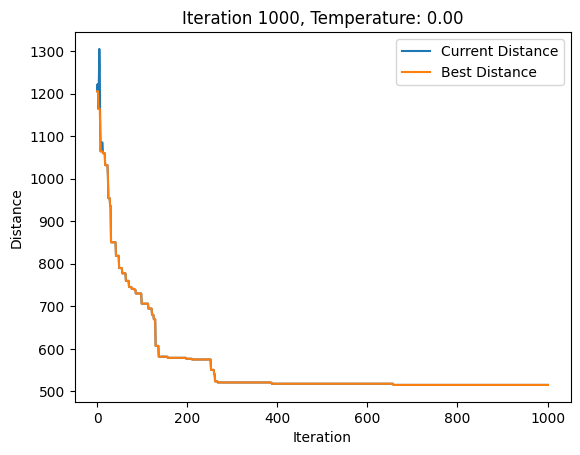

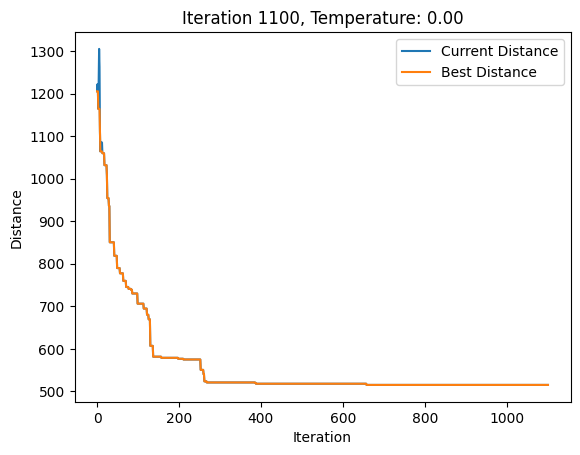

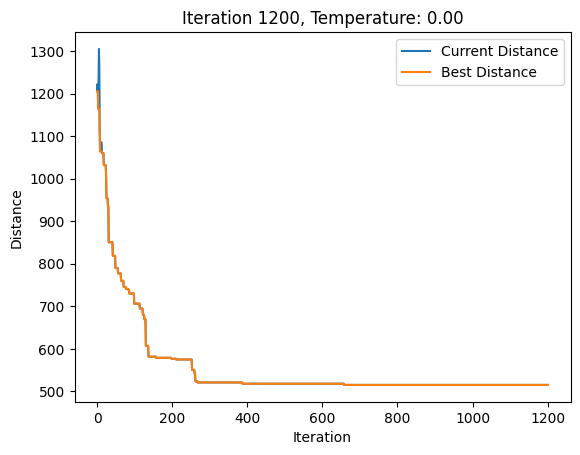

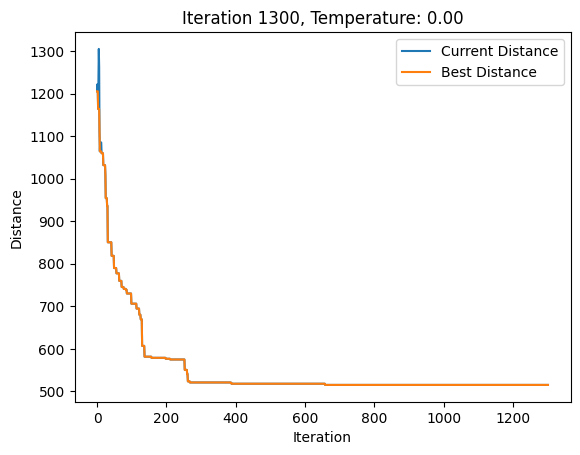

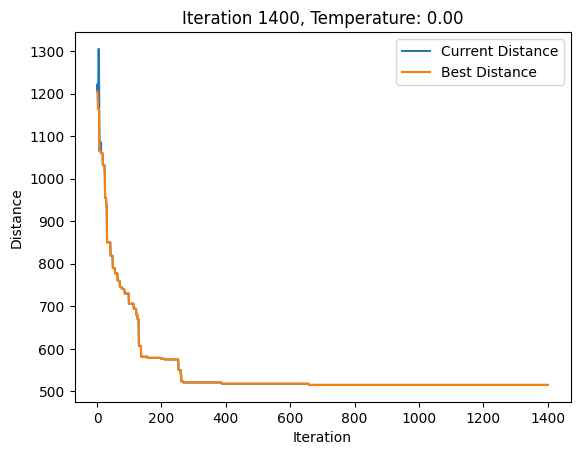

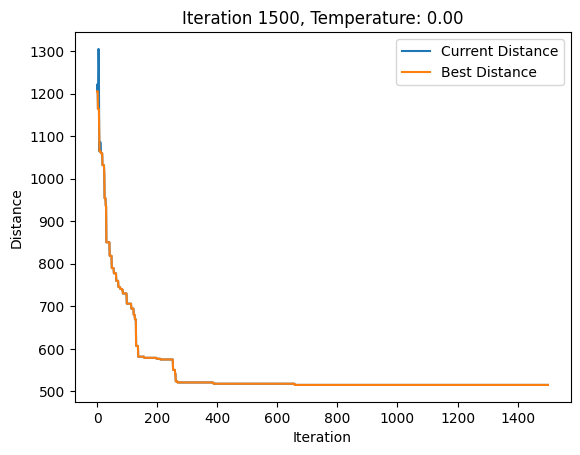

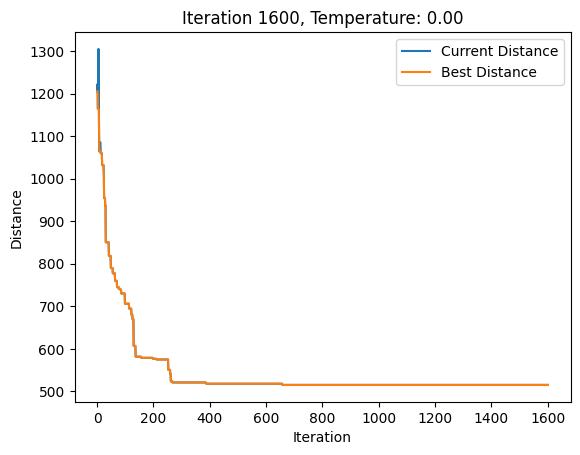

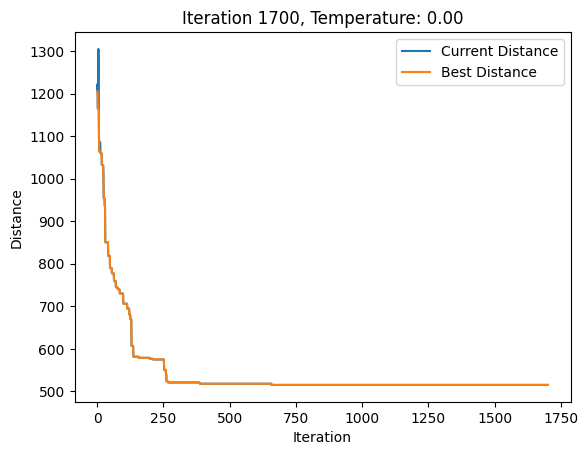

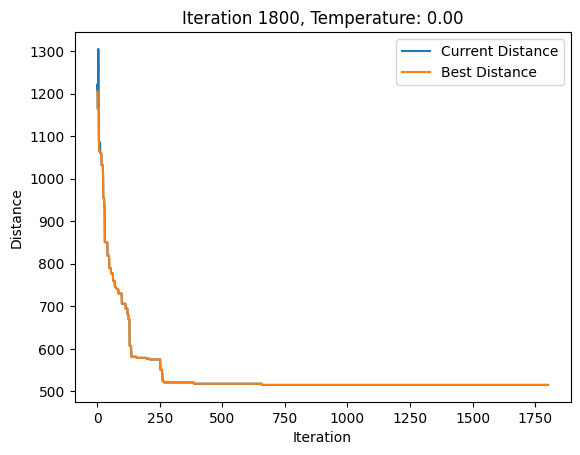

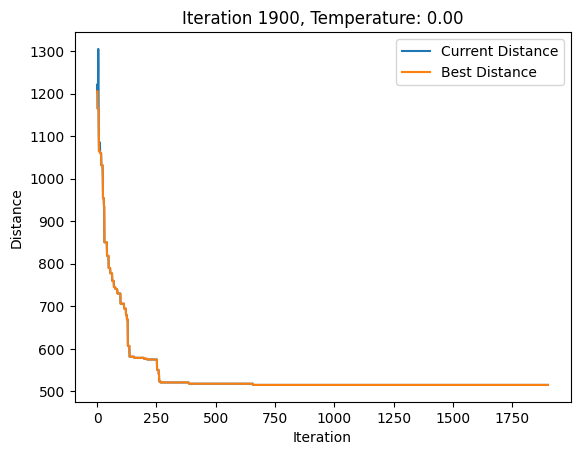

<ipython-input-2-8167b0f6711d>:53: RuntimeWarning: overflow encountered in scalar divide
  acceptance_probability = math.exp((current_distance - new_distance) / temperature)


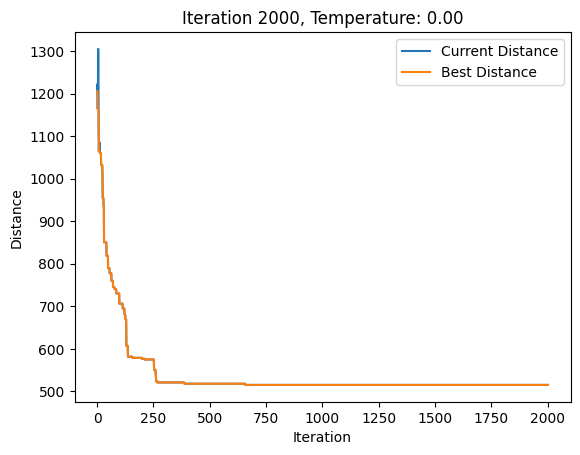

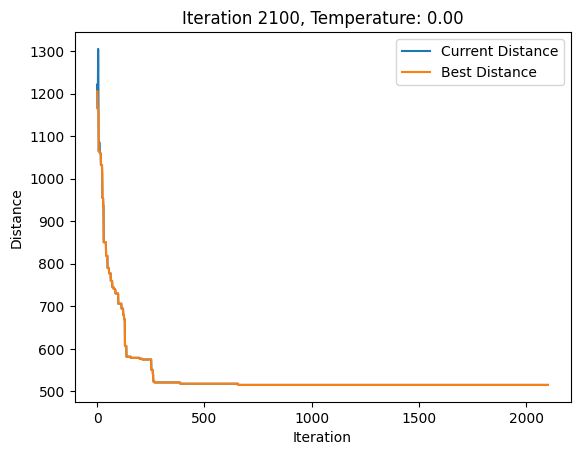

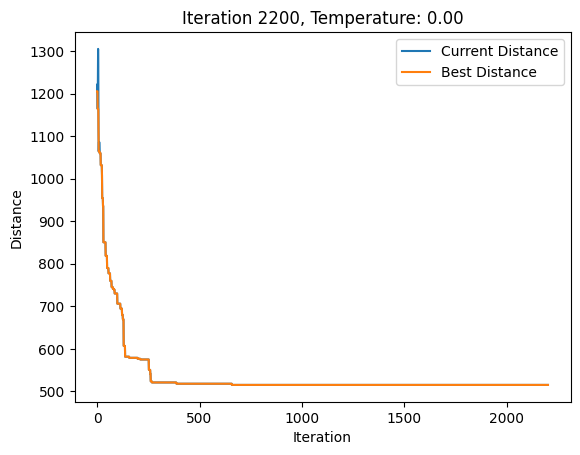

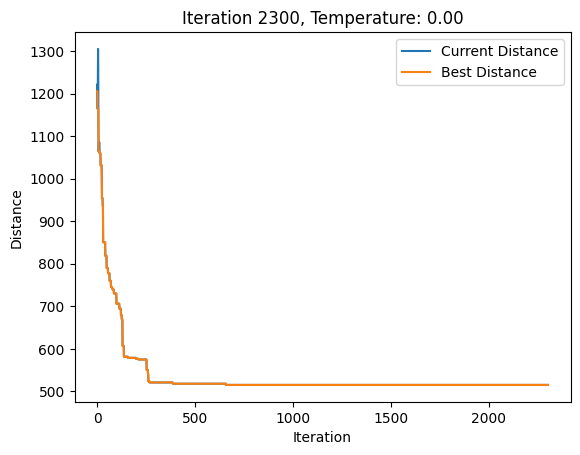

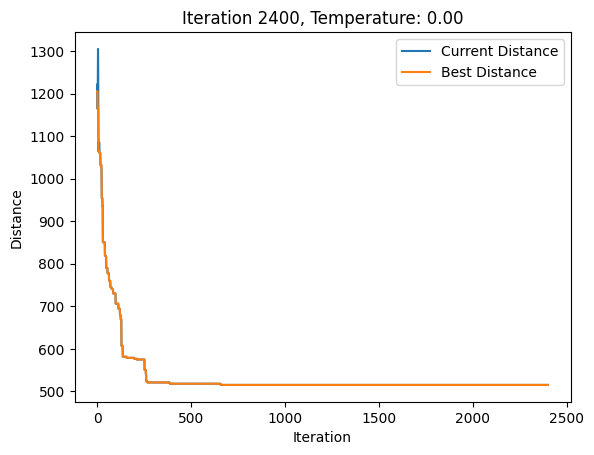

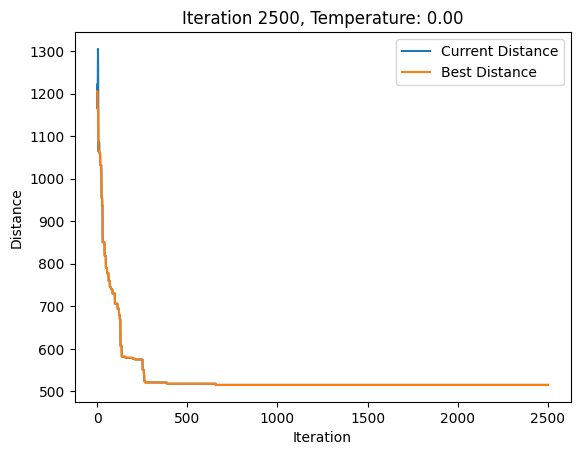

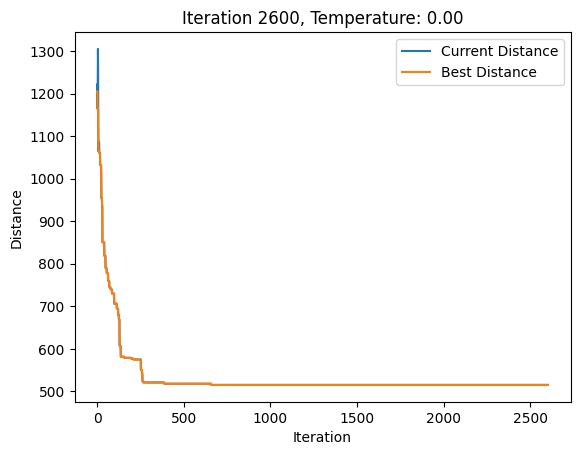

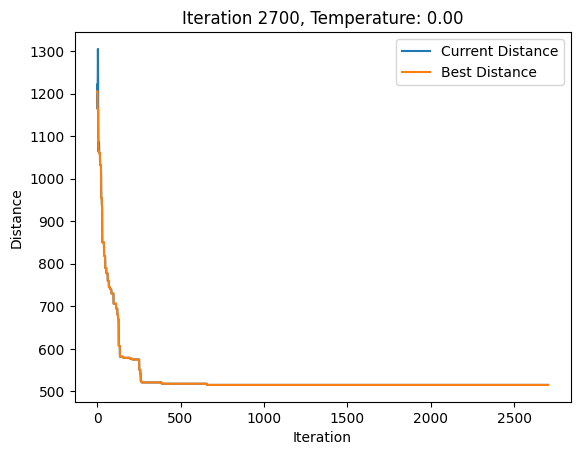

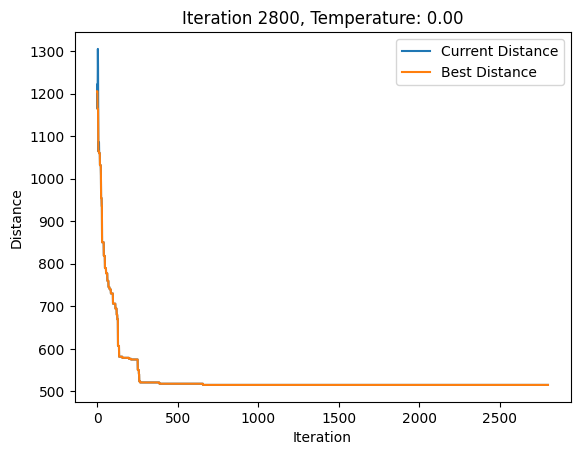

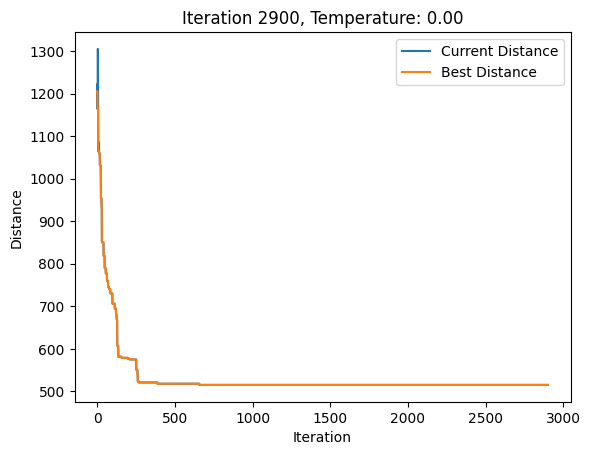

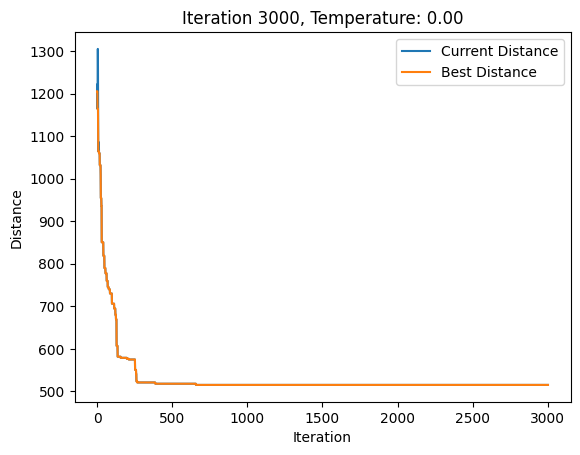

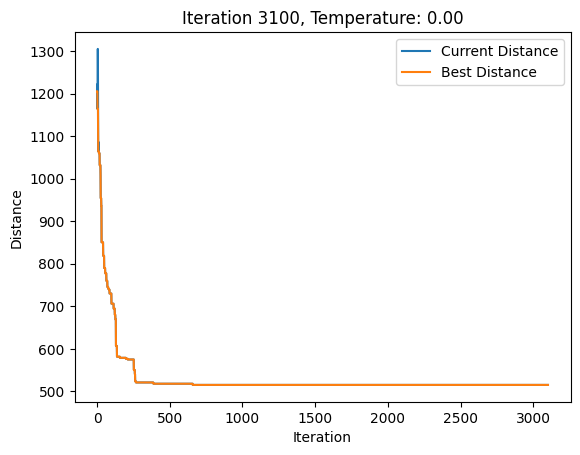

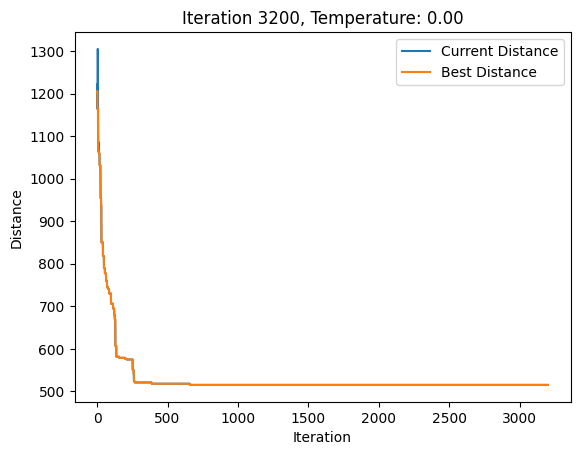

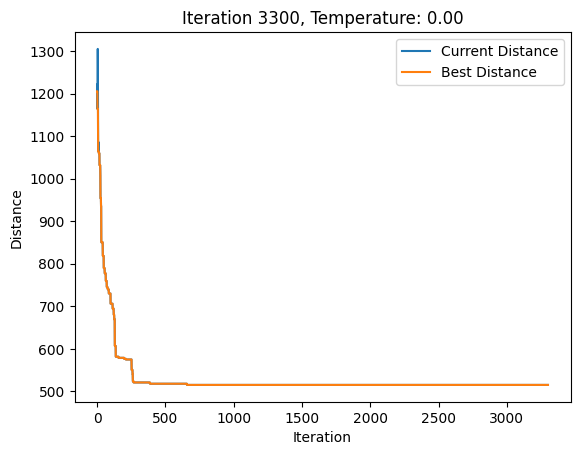

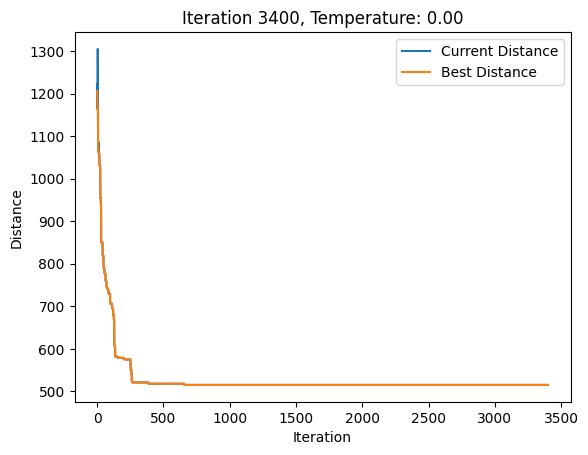

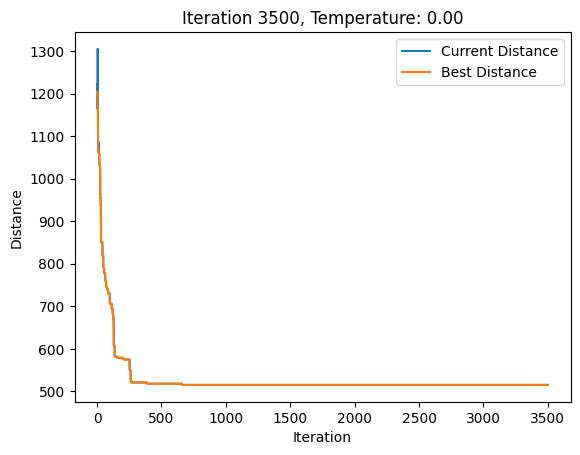

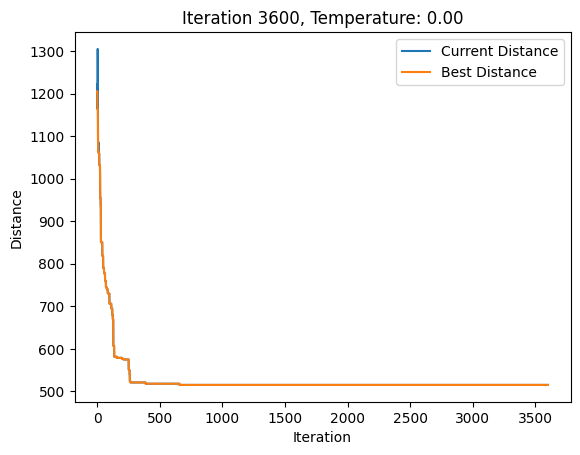

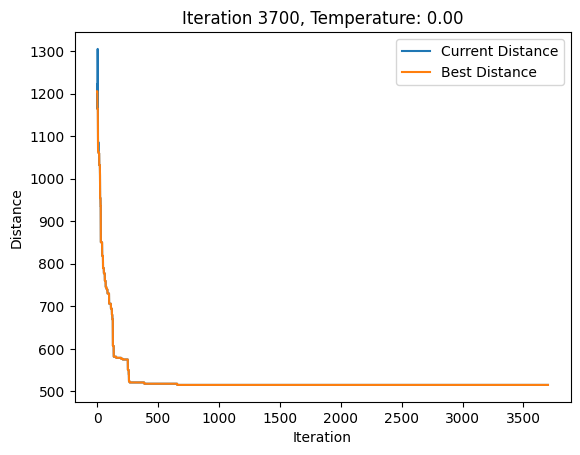

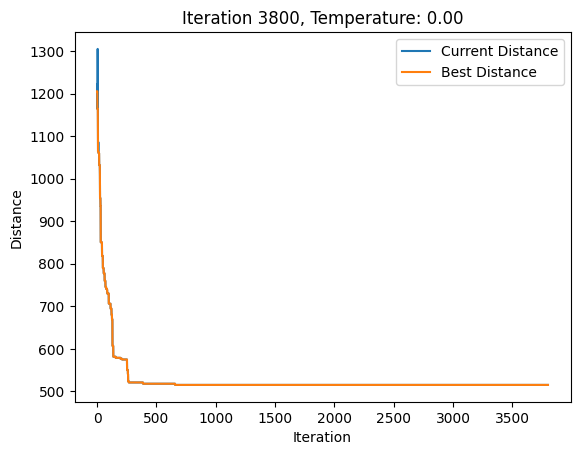

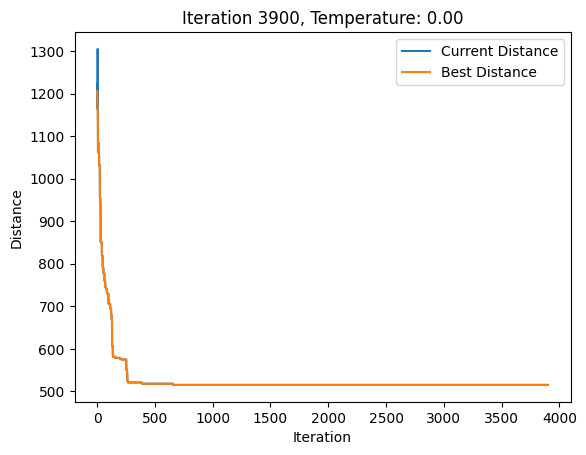

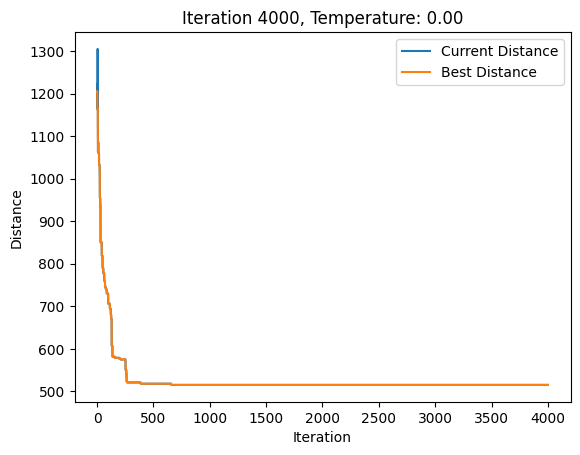

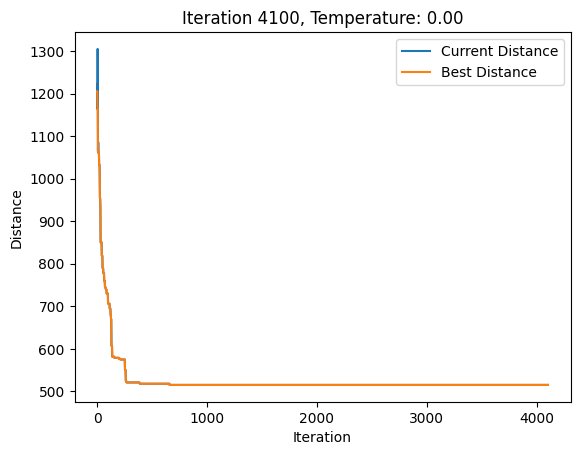

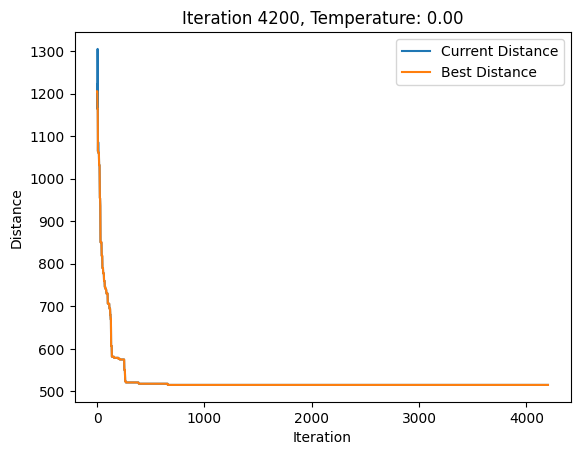

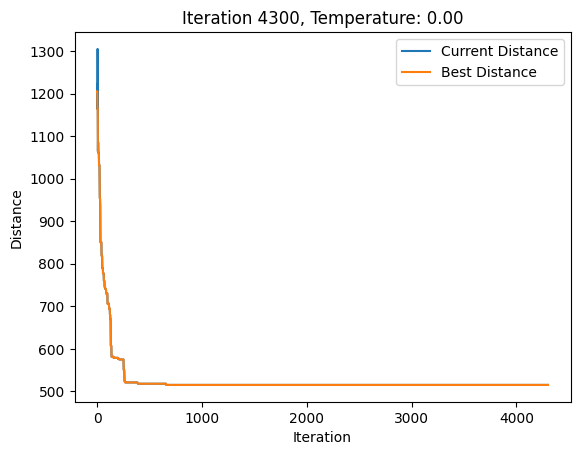

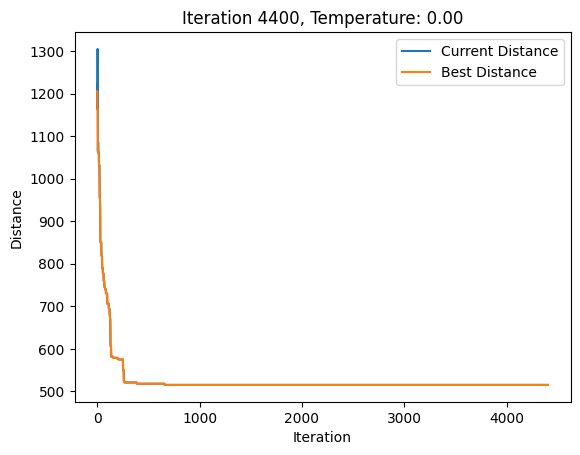

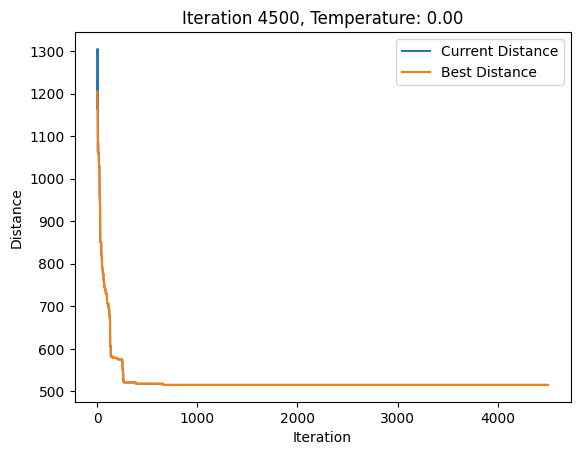

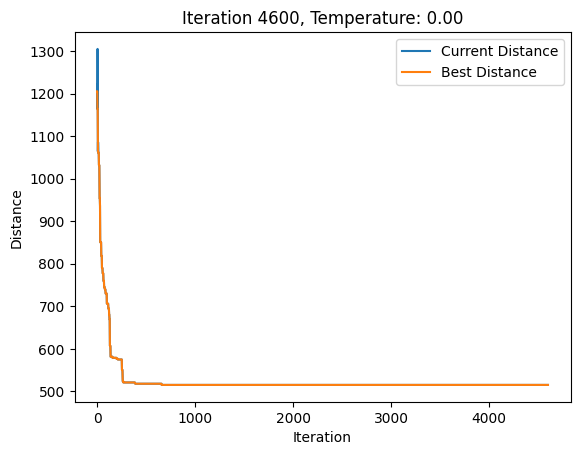

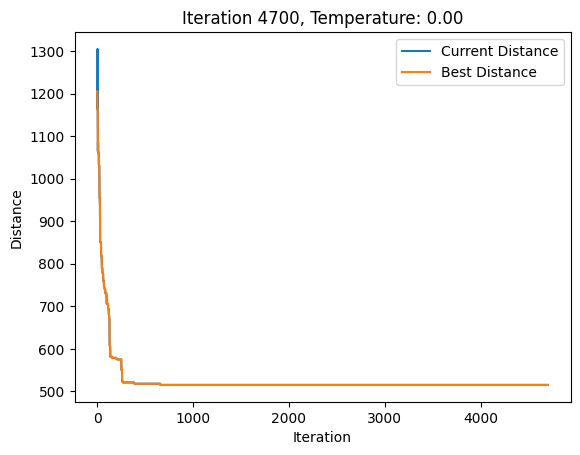

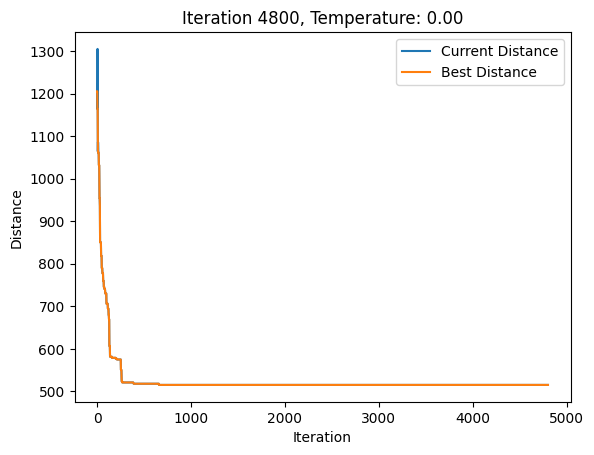

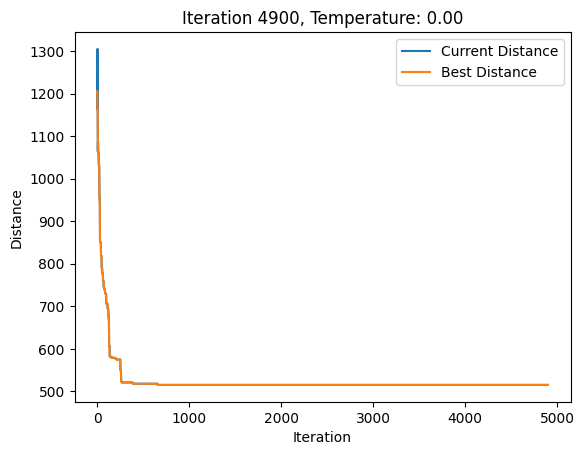

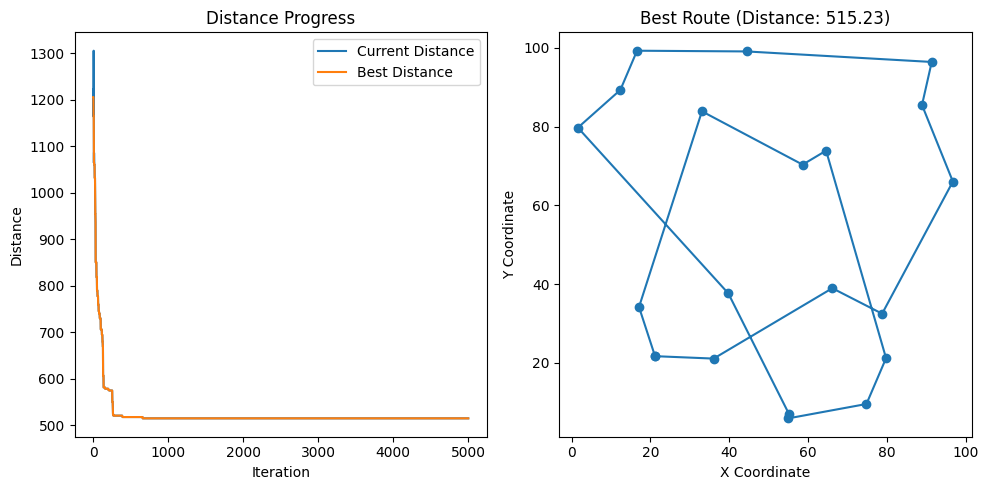

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# number of cities
num_cities = 20
cities = np.random.rand(num_cities, 2) * 100  # Randomly generate city coordinates

# total distance of a route
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route)):
        city_a = route[i]
        city_b = route[(i + 1) % len(route)]  # Wrap around to the first city
        total_distance += np.linalg.norm(cities[city_a] - cities[city_b])
    return total_distance

# generating a random initial route
def generate_initial_route(num_cities):
    route = list(range(num_cities))
    random.shuffle(route)
    return route

# generating a new route (swapping two cities)
def generate_new_route(route):
    new_route = route.copy()
    i, j = random.sample(range(len(route)), 2)
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Simulated Annealing core
def simulated_annealing(cities, initial_temp, cooling_rate, num_iterations):
    current_route = generate_initial_route(len(cities))
    current_distance = calculate_total_distance(current_route)
    best_route = current_route.copy()
    best_distance = current_distance
    temperature = initial_temp

    # Lists to store the progress for visualization
    distances = [current_distance]
    best_distances = [best_distance]

    for iteration in range(num_iterations):

        new_route = generate_new_route(current_route)
        new_distance = calculate_total_distance(new_route)

        # Calculate the acceptance probability
        if new_distance < current_distance:
            acceptance_probability = 1.0
        else:
            acceptance_probability = math.exp((current_distance - new_distance) / temperature)

        # Accept the new route with a certain probability
        if acceptance_probability > random.random():
            current_route = new_route
            current_distance = new_distance

            # Update the best route if the current route is better
            if current_distance < best_distance:
                best_route = current_route.copy()
                best_distance = current_distance

        # Cool down the temperature
        temperature *= cooling_rate

        # Store the progress for visualization
        distances.append(current_distance)
        best_distances.append(best_distance)

        # Plot the progress every 100 iterations
        if iteration % 100 == 0:
            plt.clf()
            plt.plot(distances, label="Current Distance")
            plt.plot(best_distances, label="Best Distance")
            plt.xlabel("Iteration")
            plt.ylabel("Distance")
            plt.title(f"Iteration {iteration}, Temperature: {temperature:.2f}")
            plt.legend()
            plt.pause(0.01)

    return best_route, best_distance, distances, best_distances

# Parameters for Simulated Annealing
initial_temp = 1000
cooling_rate = 0.995
num_iterations = 5000

# Run Simulated Annealing
best_route, best_distance, distances, best_distances = simulated_annealing(cities, initial_temp, cooling_rate, num_iterations)

# Plot the final best route
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(distances, label="Current Distance")
plt.plot(best_distances, label="Best Distance")
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.title("Distance Progress")
plt.legend()

plt.subplot(1, 2, 2)
best_route_coords = cities[best_route]
best_route_coords = np.vstack([best_route_coords, best_route_coords[0]])  # Close the loop
plt.plot(best_route_coords[:, 0], best_route_coords[:, 1], 'o-')
plt.title(f"Best Route (Distance: {best_distance:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.tight_layout()
plt.show()